# Especialització de DataScience de la IT ACADEMY
### *Exercicis d'Hipotesis Testing.*
### *Sprint5 - Tasca M5 T01 - Exercici 1*
#### Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

#### Alumne: Jorge Prieto Rey

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [34]:
# Resultados de la liga 
df = pd.read_csv('Lligues europees UEFA.csv')
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbapp� - 25,Keylor Navas


In [35]:
df.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [36]:
#Seleccionamos las columnas con valores númericos unicamente
dfNum=df.select_dtypes(np.number)
dfNum.head()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
0,1,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,52739
1,2,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,53367
2,3,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,40624
3,4,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176
4,5,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,41188


In [37]:
dfNum.describe().round(4)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000
mean,49.5000,10.3163,36.3061,13.4490,9.4082,13.4490,50.8776,50.8776,0.0000,49.7347,1.3702,48.6531,48.6459,-0.0051,0.0009,24239.8571
std,28.4341,5.7069,1.1524,5.7475,2.9034,5.1235,16.1029,13.6346,26.5019,16.1664,0.4439,12.4539,9.8125,19.9925,0.5514,14874.1718
min,1.0000,1.0000,34.0000,3.0000,3.0000,2.0000,23.0000,24.0000,-56.0000,18.0000,0.5300,28.2000,26.8000,-40.4000,-1.0900,5870.0000
25%,25.2500,5.2500,36.0000,9.0000,7.0000,10.0000,39.0000,40.0000,-17.7500,37.0000,1.0000,39.1000,41.3000,-13.5750,-0.3650,12355.5000
50%,49.5000,10.0000,37.0000,13.0000,9.0000,13.0000,47.0000,50.0000,-1.0000,46.0000,1.3000,46.4500,47.7500,-1.1000,-0.0300,20491.0000
75%,73.7500,15.0000,37.0000,17.0000,11.0000,17.0000,60.0000,59.0000,17.2500,61.7500,1.6950,55.5500,54.7000,12.8000,0.3550,32382.0000
max,98.0000,20.0000,37.0000,28.0000,16.0000,26.0000,97.0000,89.0000,72.0000,90.0000,2.4300,88.1000,73.3000,59.3000,1.6000,73150.0000


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

- $H_0 = $ the sample has a Gaussian distribution
- $H_1 = $ the sample does not have a Gaussian distribution.

In [38]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

In [39]:
sample =  df['Attendance'].sample(frac=.1, random_state=1)
# normality test
stat, p = shapiro(sample)
print("Test-Statistic = %.3f , p-value = %.3f"%(stat,p))
# interpret
alpha = 0.05
print("With a confidence level of {}%".format((1-alpha)*100))
if p > alpha:
	print('Sample come from a Gaussian distribution (fail to reject H0)')
else:
	print('Sample does not come from a Gaussian distribution (reject H0)')

Test-Statistic = 0.850 , p-value = 0.059
With a confidence level of 95.0%
Sample come from a Gaussian distribution (fail to reject H0)


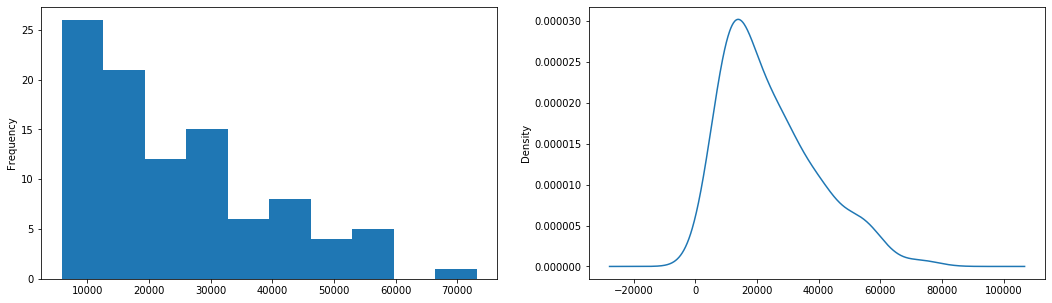

In [40]:
plt.rcParams["figure.figsize"] = (18, 5)
fig, axes = plt.subplots(nrows=1, ncols=2)
df['Attendance'].plot.hist(ax=axes[0])
df['Attendance'].plot.kde(ax=axes[1])

### *Sprint5 - Tasca M5 T01 - Exercici 2*
#### Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.


<h3>Pts vs. Attendance</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'Pts' and 'Attendance'.

In [41]:
pearson_coef, p_value = stats.pearsonr(df['Pts'], df['Attendance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
# interpret
alpha = 0.05
print("With a confidence level of {}%".format((1-alpha)*100))
if p > alpha:
	print('The correlation between points and number of attendance is statistically significant')
else:
	print('the correlation between points and number of attendance is not statistically significant')

The Pearson Correlation Coefficient is 0.5792612831808652  with a P-value of P = 4.1381860089628327e-10
With a confidence level of 95.0%
The correlation between points and number of attendance is statistically significant


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between points and number of attendance is statistically significant, although the linear relationship isn't extremely strong (~0.579).</p>

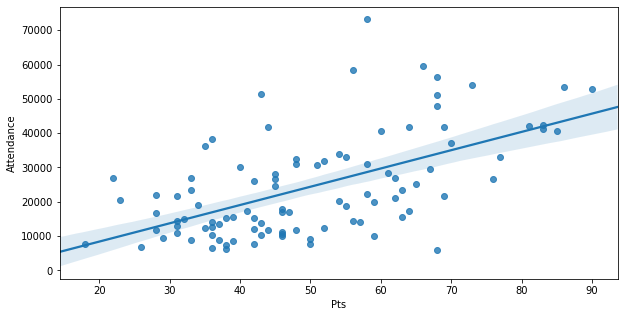

In [42]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.regplot(x="Pts", y="Attendance", data=df)

### *Sprint5 - Tasca M5 T01 - Exercici 3*
#### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [43]:
from statsmodels.stats.anova import AnovaRM

In [44]:
df['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

In [45]:
df_group_test = df[['Country','Squad','Attendance']]
df_group_test1 = df_group_test.groupby(['Country'],as_index=False).mean()
df_group_test1

,Country,Attendance
0,ENG,39538.700000
1,ESP,22937.600000
2,FRA,20314.000000
3,GER,21025.055556
4,ITA,17062.450000


In [46]:
 df_group_test.groupby('Country').size()

Country
ENG    20
ESP    20
FRA    20
GER    18
ITA    20
dtype: int64

In [47]:
df_group_test2 = df_group_test.groupby(['Squad'],as_index=False).mean().sort_values('Attendance', ascending=False)
df_group_test2.head(20)

,Squad,Attendance
57,Manchester Utd,73150
3,Arsenal,59636
95,West Ham,58370
87,Tottenham,56234
9,Barcelona,53933
50,Liverpool,53367
56,Manchester City,52739
65,Newcastle Utd,51443
58,Marseille,51082
7,Atl�tico Madrid,48039


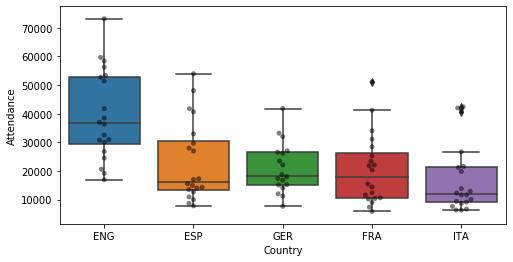

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Country", y="Attendance", data=df, ax=ax)
sns.swarmplot(x="Country", y="Attendance", data=df, color='black', alpha = 0.5, ax=ax);

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if differents 'Country' impact 'Attendance', we group the data.</p>

In [49]:
df_gptest = df[['Country','Squad','Attendance']]
grouped_test=df[['Country', 'Attendance']].groupby(['Country'])
grouped_test.head(2)

,Country,Attendance
0,ENG,52739
1,ENG,53367
2,ESP,40624
3,GER,33176
4,FRA,41188
5,ITA,42388
6,ITA,41995
8,GER,41800
9,ESP,53933
13,FRA,5870


In [50]:
df_gptest.head(10)

,Country,Squad,Attendance
0,ENG,Manchester City,52739
1,ENG,Liverpool,53367
2,ESP,Real Madrid,40624
3,GER,Bayern Munich,33176
4,FRA,Paris S-G,41188
5,ITA,Milan,42388
6,ITA,Inter,41995
7,ITA,Napoli,26681
8,GER,Dortmund,41800
9,ESP,Barcelona,53933


In [51]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test.get_group('ENG')['Attendance'], grouped_test.get_group('ESP')['Attendance'], 
                              grouped_test.get_group('FRA')['Attendance'],grouped_test.get_group('ITA')['Attendance'],
                             grouped_test.get_group('GER')['Attendance'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

alpha = 0.05
print("With a confidence level of {}%".format((1-alpha)*100))
if p > alpha:
	print('The dependence of the quantitative variables according to the groups of the categorical variables is statistically significant')
else:
	print('The dependence of the quantitative variables according to the groups of the categorical variables is not statistically significant')

ANOVA results: F= 9.531073835720898 , P = 1.6755280882403337e-06
With a confidence level of 95.0%
The dependence of the quantitative variables according to the groups of the categorical variables is statistically significant


In [52]:
import statsmodels.api as sm

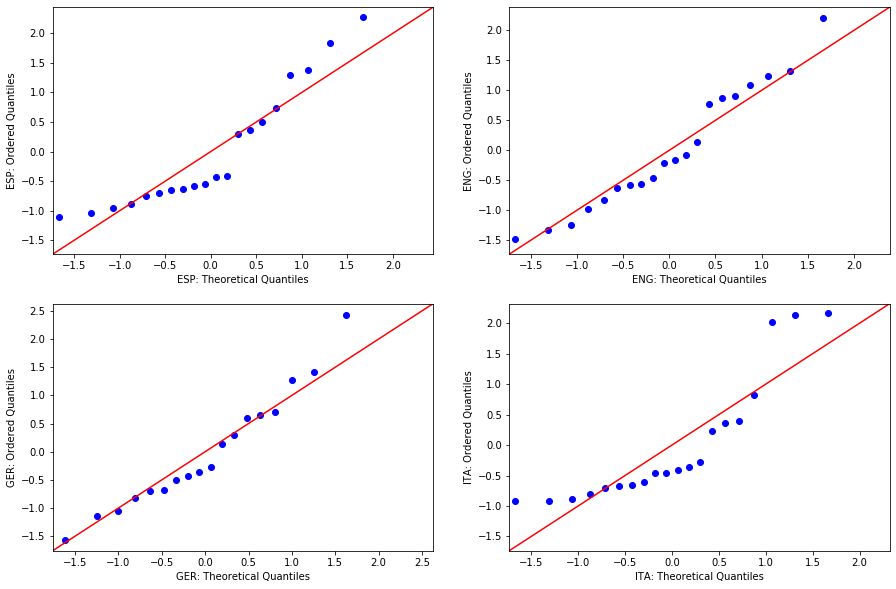

In [31]:
# qqplot graphs
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sm.qqplot(df_gptest.loc[df_gptest.Country=='ESP', 'Attendance'], dist='norm', fit= True, line="45", 
          xlabel='ESP: Theoretical Quantiles', ylabel='ESP: Ordered Quantiles',ax = axs[0, 0])
plt.close()
sm.qqplot(df_gptest.loc[df_gptest.Country=='ENG', 'Attendance'], dist='norm', fit= True, line="45", 
          xlabel='ENG: Theoretical Quantiles', ylabel='ENG: Ordered Quantiles',ax = axs[0, 1])
plt.close()
sm.qqplot(df_gptest.loc[df_gptest.Country=='GER', 'Attendance'], dist='norm', fit= True, line="45", 
          xlabel='GER: Theoretical Quantiles', ylabel='GER: Ordered Quantiles',ax = axs[1, 0])
plt.close()
sm.qqplot(df_gptest.loc[df_gptest.Country=='ITA', 'Attendance'], dist='norm', fit= True, line="45", 
          xlabel='ITA: Theoretical Quantiles', ylabel='ITA: Ordered Quantiles',ax = axs[1, 1])